# Import libraries & Read data from the dataset

In [112]:
#Import necessary libraries
import pandas as pd
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py

#Read data from the dataset
df=pd.read_csv(r'C:\Users\I552991\Desktop\ML & AI\Course 2 - Statistics Essentials\Module 1 - Lending Club case study\loan\loan.csv')

C:\Users\I552991\AppData\Local\Temp\ipykernel_2752\1863862459.py:12: DtypeWarning:

Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.



## Data cleaning 

In [113]:
#Shape of the dataset before cleaning
df.shape

(39717, 111)

In [114]:
#Remove entries which are on-going loans because we can't predict the outcome of it
df= df[~(df.loan_status == 'Current')]

#Delete the columns with has all values as NaNs 
df = df.dropna(how='all', axis=1)

#Read all Columns with number of unique values
col = df.nunique()
for items in col.iteritems():
    print(items)

('id', 38577)
('member_id', 38577)
('loan_amnt', 870)
('funded_amnt', 1019)
('funded_amnt_inv', 8050)
('term', 2)
('int_rate', 370)
('installment', 15022)
('grade', 7)
('sub_grade', 35)
('emp_title', 28027)
('emp_length', 11)
('home_ownership', 5)
('annual_inc', 5215)
('verification_status', 3)
('issue_d', 55)
('loan_status', 2)
('pymnt_plan', 1)
('url', 38577)
('desc', 25803)
('purpose', 14)
('title', 19297)
('zip_code', 822)
('addr_state', 50)
('dti', 2853)
('delinq_2yrs', 11)
('earliest_cr_line', 524)
('inq_last_6mths', 9)
('mths_since_last_delinq', 95)
('mths_since_last_record', 111)
('open_acc', 40)
('pub_rec', 5)
('revol_bal', 21275)
('revol_util', 1088)
('total_acc', 82)
('initial_list_status', 1)
('out_prncp', 1)
('out_prncp_inv', 1)
('total_pymnt', 36714)
('total_pymnt_inv', 36387)
('total_rec_prncp', 6841)
('total_rec_int', 34025)
('total_rec_late_fee', 1320)
('recoveries', 4040)
('collection_recovery_fee', 2616)
('last_pymnt_d', 101)
('last_pymnt_amnt', 34418)
('last_credit_

In [115]:
#Removing columns with has only one unique value
df.drop('tax_liens',axis=1 , inplace=True)
df.drop('delinq_amnt',axis=1 , inplace=True)
df.drop('chargeoff_within_12_mths',axis=1 , inplace=True)
df.drop('acc_now_delinq',axis=1 , inplace=True)
df.drop('application_type',axis=1 , inplace=True)
df.drop('policy_code',axis=1 , inplace=True)
df.drop('collections_12_mths_ex_med',axis=1 , inplace=True)
df.drop('out_prncp_inv',axis=1 , inplace=True)
df.drop('out_prncp',axis=1 , inplace=True)
df.drop('initial_list_status',axis=1 , inplace=True)
df.drop('pymnt_plan',axis=1 , inplace=True)

#Removing columns which are not required for the calculation or duplicate columns
df.drop('member_id',axis=1 , inplace=True)
df.drop('emp_title',axis=1 , inplace=True)
df.drop('url',axis=1 , inplace=True)
df.drop('desc',axis=1 , inplace=True)
df.drop('title',axis=1 , inplace=True)

In [116]:
df.isna().sum()

id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1033
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     24905
mths_since_last_record     35837
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
total_pymnt                    0
total_pymn

In [117]:
#Removing columns which are mosly null
df.drop('mths_since_last_delinq',axis=1 , inplace=True)
df.drop('mths_since_last_record',axis=1 , inplace=True)

#Removing columns which makes sense only for existing customer
df.drop('delinq_2yrs',axis=1 , inplace=True)
df.drop('earliest_cr_line',axis=1 , inplace=True)
df.drop('revol_bal',axis=1 , inplace=True)
df.drop('revol_util',axis=1 , inplace=True)
df.drop('total_acc',axis=1 , inplace=True)
df.drop('total_pymnt',axis=1 , inplace=True)
df.drop('total_pymnt_inv',axis=1 , inplace=True)
df.drop('total_rec_prncp',axis=1 , inplace=True)
df.drop('total_rec_int',axis=1 , inplace=True)
df.drop('total_rec_late_fee',axis=1 , inplace=True)
df.drop('recoveries',axis=1 , inplace=True)
df.drop('collection_recovery_fee',axis=1 , inplace=True)
df.drop('last_pymnt_d',axis=1 , inplace=True)
df.drop('last_pymnt_amnt',axis=1 , inplace=True)
df.drop('last_credit_pull_d',axis=1 , inplace=True)

In [118]:
#Convert Interest rate columns from string to integer
df['int_rate'] = df['int_rate'].map(lambda x: x[:2])
df['int_rate'] = df['int_rate'].map(lambda x: x.replace('.',''))

#Create new columns such as Issue month and Issue Year from Issue date
df['issue_month'] = df['issue_d'].map(lambda x: x[:-3])
df['issue_year'] = df['issue_d'].map(lambda x: '20'+x[4:])

#Removing rows as outliners considering annual income
q1=df.annual_inc.quantile(0.25)
q3=df.annual_inc.quantile(0.75)
iqr = q3 - q1
df = df[~((df.annual_inc<(q1-1.5*iqr)))]
df = df[~((df.annual_inc>(q3+1.5*iqr)))]

In [119]:
#Shape of the dataset after cleaning
df.shape

(36815, 25)

## Univariate Analysis

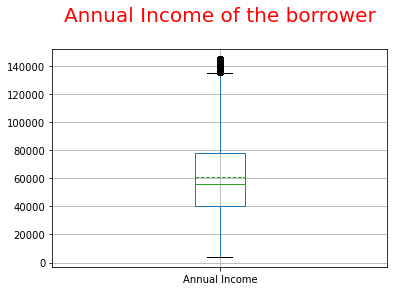

In [120]:
#Univariate Analysis on Quantative Variable Annual Income
df.annual_inc.to_frame('Annual Income').boxplot(meanline=True, showmeans=True)
plt.title('Annual Income of the borrower\n', fontdict={'fontsize':20,'color':'Red'})
plt.show()

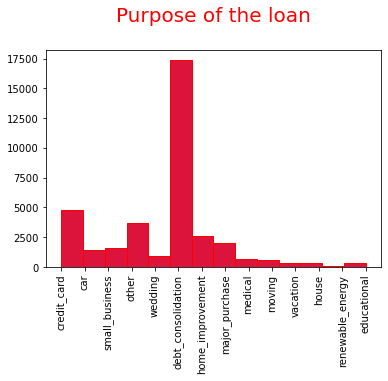

In [121]:
#Univariate Analysis on Categorical Variable Purpose
plt.hist(df.purpose, bins=14, edgecolor='Red',color = 'Crimson')
plt.title('Purpose of the loan\n', fontdict={'fontsize':20,'color':'Red'})
plt.xticks(rotation=90)
plt.show()

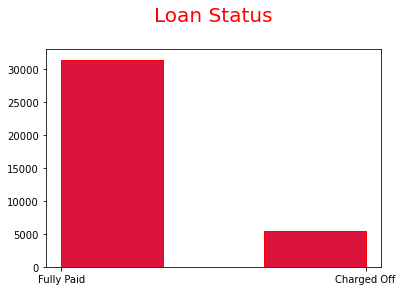

In [122]:
#Univariate Analysis on Loan status
plt.hist(df.loan_status, bins=3, edgecolor='Red',color = 'Crimson')
plt.title('Loan Status\n', fontdict={'fontsize':20,'color':'Red'})
plt.show()

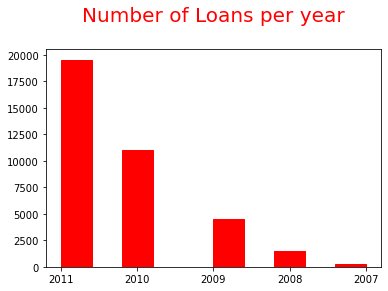

In [123]:
#Univariate Analysis on Issue year
plt.hist(df.issue_year, bins=10, edgecolor='Red',color = 'Red')
plt.title('Number of Loans per year\n', fontdict={'fontsize':20,'color':'Red'})
plt.show()

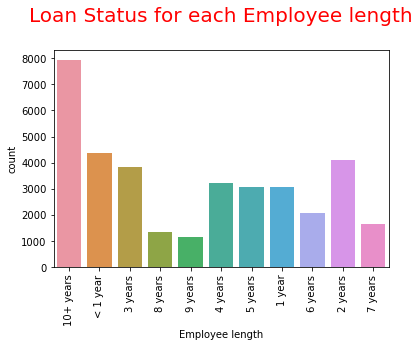

In [124]:
#Univariate Analysis on Employee length
sns.countplot(x='emp_length', data=df)
plt.title('Loan Status for each Employee length\n', fontdict={'fontsize':20,'color':'Red'})
plt.xticks(rotation=90)
plt.xlabel('Employee length')
plt.show()

## Bivariate Analysis

In [125]:
#Bivariate Analysis on Grade and Loan status
df_grade = pd.pivot_table(df,index=['loan_status'],columns=['grade'],aggfunc={'grade':'count'})
df_grade['GrandTot'] = df_grade.sum(axis=1)
df_grade.loc['Total'] = df_grade.sum()
df_grade.loc['Charged Off %'] = (df_grade.loc['Charged Off'].div(df_grade.loc['Total'], fill_value=0) *100)
df_grade

grade                                          \
grade                    A             B            C            D   
loan_status                                                          
Charged Off     593.000000   1380.000000  1326.000000  1083.000000   
Fully Paid     9091.000000   9772.000000  6180.000000  3773.000000   
Total          9684.000000  11152.000000  7506.000000  4856.000000   
Charged Off %     6.123503     12.374462    17.665867    22.302306   

                                                        GrandTot  
grade                    E           F           G                
loan_status                                                       
Charged Off     662.000000  291.000000   96.000000   5431.000000  
Fully Paid     1798.000000  599.000000  171.000000  31384.000000  
Total          2460.000000  890.000000  267.000000  36815.000000  
Charged Off %    26.910569   32.696629   35.955056     14.752139

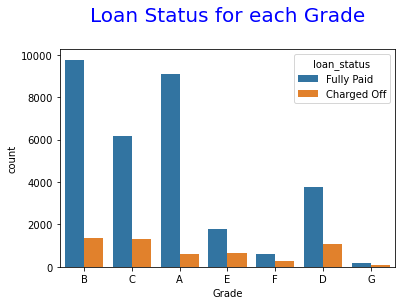

In [137]:
sns.countplot(x='grade', hue='loan_status', data=df)
plt.title('Loan Status for each Grade\n', fontdict={'fontsize':20,'color':'Blue'})
plt.xlabel('Grade')
plt.show()

In [127]:
#Bivariate Analysis on Term
df_term = pd.pivot_table(df,index=['loan_status'],columns=['term'],aggfunc={'term':'count'})
df_term['Grand Total'] = df_term.sum(axis=1)
df_term.loc['Total'] = df_term.sum()
df_term.loc['Charged Off %'] = (df_term.loc['Charged Off'].div(df_term.loc['Total'], fill_value=0) *100)
df_term

term                Grand Total
term              36 months    60 months              
loan_status                                           
Charged Off     3120.000000  2311.000000   5431.000000
Fully Paid     24717.000000  6667.000000  31384.000000
Total          27837.000000  8978.000000  36815.000000
Charged Off %     11.208104    25.740699     14.752139

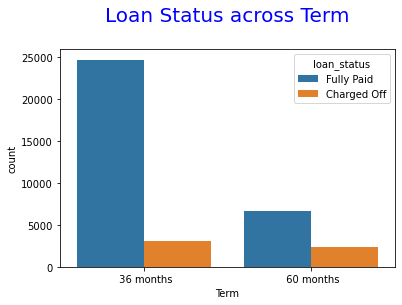

In [138]:
sns.countplot(x='term', hue='loan_status', data=df)
plt.title('Loan Status across Term\n', fontdict={'fontsize':20,'color':'Blue'})
plt.xlabel('Term')
plt.show()

In [129]:
#Bivariate Analysis on Purpose
df_purpose = pd.pivot_table(df,index=['loan_status'],columns=['purpose'],aggfunc={'purpose':'count'})
df_purpose['Grand Total'] = df_purpose.sum(axis=1)
df_purpose.loc['Total'] = df_purpose.sum()
df_purpose.loc['Charged Off %'] = (df_purpose.loc['Charged Off'].div(df_purpose.loc['Total'], fill_value=0) *100)
df_purpose

purpose                                              \
purpose               car  credit_card debt_consolidation educational   
loan_status                                                             
Charged Off     159.00000   522.000000        2684.000000   54.000000   
Fully Paid     1297.00000  4281.000000       14694.000000  259.000000   
Total          1456.00000  4803.000000       17378.000000  313.000000   
Charged Off %    10.92033    10.868207          15.444815   17.252396   

                                                                       \
purpose       home_improvement       house major_purchase     medical   
loan_status                                                             
Charged Off           322.0000   55.000000     217.000000  104.000000   
Fully Paid           2262.0000  283.000000    1837.000000  538.000000   
Total                2584.0000  338.000000    2054.000000  642.000000   
Charged Off %          12.4613   16.272189      10.564752   16.199377   

                                                                        \
purpose            moving        other renewable_energy small_business   
loan_status                                                              
Charged Off     90.000000   607.000000        18.000000     454.000000   
Fully Paid     460.000000  3105.000000        77.000000    1175.000000   
Total          550.000000  3712.000000        95.000000    1629.000000   
Charged Off %   16.363636    16.352371        18.947368      27.869859   

                                        Grand Total  
purpose          vacation     wedding                
loan_status                                          
Charged Off     52.000000   93.000000   5431.000000  
Fully Paid     313.000000  803.000000  31384.000000  
Total          365.000000  896.000000  36815.000000  
Charged Off %   14.246575   10.379464     14.752139

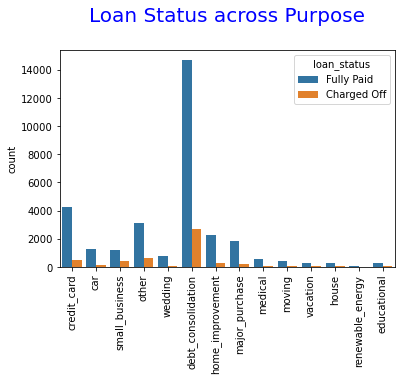

In [139]:
sns.countplot(x='purpose', hue='loan_status', data=df)
plt.title('Loan Status across Purpose\n', fontdict={'fontsize':20,'color':'Blue'})
plt.xticks(rotation=90)
plt.xlabel('')
plt.show()

In [131]:
#Bivariate Analysis on Issue Year
df_year = pd.pivot_table(df,index=['loan_status'],columns=['issue_year'],aggfunc={'issue_year':'count'})
df_year['Grand Total'] = df_year.sum(axis=1)
df_year.loc['Total'] = df_year.sum()
df_year.loc['Charged Off %'] = (df_year.loc['Charged Off'].div(df_year.loc['Total'], fill_value=0) *100)
df_year

issue_year                                          \
issue_year           2007         2008         2009          2010   
loan_status                                                         
Charged Off     42.000000   237.000000   568.000000   1432.000000   
Fully Paid     189.000000  1257.000000  3929.000000   9629.000000   
Total          231.000000  1494.000000  4497.000000  11061.000000   
Charged Off %   18.181818    15.863454    12.630643     12.946388   

                             Grand Total  
issue_year            2011                
loan_status                               
Charged Off     3152.00000   5431.000000  
Fully Paid     16380.00000  31384.000000  
Total          19532.00000  36815.000000  
Charged Off %     16.13762     14.752139

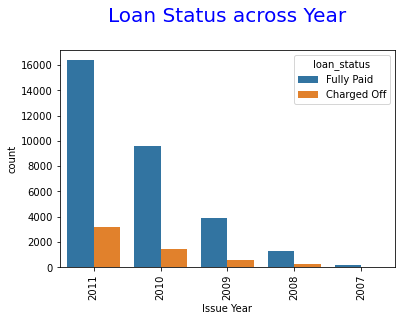

In [140]:
sns.countplot(x='issue_year', hue='loan_status', data=df)
plt.title('Loan Status across Year\n', fontdict={'fontsize':20,'color':'Blue'})
plt.xticks(rotation=90)
plt.xlabel('Issue Year')
plt.show()

In [133]:
df.pub_rec_bankruptcies.value_counts()

0.0    34547
1.0     1602
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [134]:
#Bivariate Analysis on Bankruptcie
df_bnkrupt = pd.pivot_table(df,index=['loan_status'],columns=['pub_rec_bankruptcies'],aggfunc={'pub_rec_bankruptcies':'count'})
df_bnkrupt['Grand Total'] = df_bnkrupt.sum(axis=1)
df_bnkrupt.loc['Total'] = df_bnkrupt.sum()
df_bnkrupt.loc['Charged Off %'] = (df_bnkrupt.loc['Charged Off'].div(df_bnkrupt.loc['Total'], fill_value=0) *100)
df_bnkrupt

pub_rec_bankruptcies                      Grand Total
pub_rec_bankruptcies                  0.0          1.0   2.0              
loan_status                                                               
Charged Off                   4955.000000   361.000000   2.0   5318.000000
Fully Paid                   29592.000000  1241.000000   3.0  30836.000000
Total                        34547.000000  1602.000000   5.0  36154.000000
Charged Off %                   14.342779    22.534332  40.0     14.709299

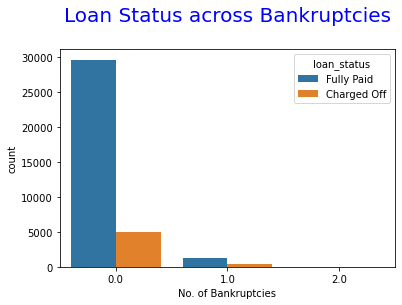

In [141]:
sns.countplot(x='pub_rec_bankruptcies', hue='loan_status', data=df)
plt.title('Loan Status across Bankruptcies\n', fontdict={'fontsize':20,'color':'Blue'})
plt.xlabel('No. of Bankruptcies')
plt.show()

## Multivariate Analysis

In [136]:
#Multivariant Analysis on Interest Rate, loan amount and Loan status
df_good = df[df.loan_status=='Fully Paid']
df_bad = df[df.loan_status=='Charged Off']

tr0 = go.Box( x = df_good['int_rate'],
              y = df_good['loan_amnt'],
              name = 'Fully Paid')
tr1 = go.Box( x = df_bad['int_rate'],
              y = df_bad['loan_amnt'],
              name = 'Charged Off')
data = [tr0,tr1]

layout = go.Layout(yaxis=dict(title='Loan Amount'),
                   xaxis=dict(title='Interest Rate'),
                   title='Multivariate Analysis on Loan amount, Interest rate and Loan status',
                   title_font_color='Green',
                   title_font_size=20,
                   boxmode='group')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')